<a href="https://colab.research.google.com/github/aarya1505/Finalyear_ml_project-/blob/main/9033_Final_year_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goldman Sachs All Time Stock Data Analysis

# Data Preparation

In [15]:
import pandas as pd

df = pd.read_csv("/content/goldmansachs.csv")

In [16]:
df.head()

,date,open,high,low,close,adj_close,volume
0,1999-05-04,48.696575,70.3750,77.250,70.0000,76.0000,22320900
1,1999-05-05,47.831593,69.1250,69.875,66.2500,69.8750,7565700
2,1999-05-06,47.009914,67.9375,69.375,67.0625,68.0000,2905700
3,1999-05-07,51.291405,74.1250,74.875,66.7500,67.9375,4862300
4,1999-05-10,48.912811,70.6875,73.500,70.2500,73.3750,2589400


In [17]:
df.shape

(6709, 7)

In [18]:
df['Date'] = pd.to_datetime(df['date'])
df = df.sort_values('Date')

In [19]:
df.head()

,date,open,high,low,close,adj_close,volume,Date
0,1999-05-04,48.696575,70.3750,77.250,70.0000,76.0000,22320900,1999-05-04
1,1999-05-05,47.831593,69.1250,69.875,66.2500,69.8750,7565700,1999-05-05
2,1999-05-06,47.009914,67.9375,69.375,67.0625,68.0000,2905700,1999-05-06
3,1999-05-07,51.291405,74.1250,74.875,66.7500,67.9375,4862300,1999-05-07
4,1999-05-10,48.912811,70.6875,73.500,70.2500,73.3750,2589400,1999-05-10


In [20]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0
Date,0


In [21]:
df[['open','high','low','close']].dtypes

,0
open,float64
high,float64
low,float64
close,float64


In [22]:
invalid_ohlc = df[
    (df['high'] < df['open']) |
    (df['high'] < df['close']) |
    (df['low'] > df['open']) |
    (df['low'] > df['close'])
]
invalid_ohlc

,date,open,high,low,close,adj_close,volume,Date
0,1999-05-04,48.696575,70.375000,77.250000,70.000000,76.000000,22320900,1999-05-04
1,1999-05-05,47.831593,69.125000,69.875000,66.250000,69.875000,7565700,1999-05-05
2,1999-05-06,47.009914,67.937500,69.375000,67.062500,68.000000,2905700,1999-05-06
3,1999-05-07,51.291405,74.125000,74.875000,66.750000,67.937500,4862300,1999-05-07
4,1999-05-10,48.912811,70.687500,73.500000,70.250000,73.375000,2589400,1999-05-10
...,...,...,...,...,...,...,...,...
6704,2025-12-26,907.039978,907.039978,913.320007,905.309998,911.000000,995300,2025-12-26
6705,2025-12-29,892.179993,892.179993,906.479980,891.559998,906.450012,1578000,2025-12-29
6706,2025-12-30,884.419983,884.419983,895.020020,881.179993,894.739990,1833300,2025-12-30
6707,2025-12-31,879.000000,879.000000,886.000000,876.789978,884.099976,1221500,2025-12-31


In [23]:
df[df.duplicated('Date')]

,date,open,high,low,close,adj_close,volume,Date


In [24]:
df = df.drop_duplicates(subset='Date')

In [25]:
df.head()

,date,open,high,low,close,adj_close,volume,Date
0,1999-05-04,48.696575,70.3750,77.250,70.0000,76.0000,22320900,1999-05-04
1,1999-05-05,47.831593,69.1250,69.875,66.2500,69.8750,7565700,1999-05-05
2,1999-05-06,47.009914,67.9375,69.375,67.0625,68.0000,2905700,1999-05-06
3,1999-05-07,51.291405,74.1250,74.875,66.7500,67.9375,4862300,1999-05-07
4,1999-05-10,48.912811,70.6875,73.500,70.2500,73.3750,2589400,1999-05-10


In [26]:
df['Price_Range'] = df['high'] - df['low']

In [27]:
df['Price_Range']

,Price_Range
0,-6.875000
1,-0.750000
2,-1.437500
3,-0.750000
4,-2.812500
...,...
6704,-6.280029
6705,-14.299988
6706,-10.600037
6707,-7.000000


In [28]:
df['Daily_Return'] = df['close'].pct_change()

In [29]:
df['Daily_Return']

,Daily_Return
0,NaN
1,-0.053571
2,0.012264
3,-0.004660
4,0.052434
...,...
6704,0.007355
6705,-0.015188
6706,-0.011643
6707,-0.004982


In [30]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6709 non-null   object        
 1   open          6709 non-null   float64       
 2   high          6709 non-null   float64       
 3   low           6709 non-null   float64       
 4   close         6709 non-null   float64       
 5   adj_close     6709 non-null   float64       
 6   volume        6709 non-null   int64         
 7   Date          6709 non-null   datetime64[ns]
 8   Price_Range   6709 non-null   float64       
 9   Daily_Return  6708 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 524.3+ KB


,open,high,low,close,adj_close,volume,Date,Price_Range,Daily_Return
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6.709000e+03,6709,6709.000000,6708.000000
mean,172.861555,203.419039,205.752305,200.988455,203.349598,4.846683e+06,2012-08-31 14:44:31.158146048,-2.333265,0.000611
min,38.619919,52.000000,54.540001,47.410000,54.000000,1.076000e+05,1999-05-04 00:00:00,-42.299988,-0.260000
25%,78.411163,106.937500,108.312500,105.250000,106.900002,2.254500e+06,2006-01-03 00:00:00,-2.949997,-0.008840
50%,130.749725,166.979996,168.470001,165.360001,167.000000,3.244700e+06,2012-08-29 00:00:00,-1.449997,0.001060
75%,191.497284,228.500000,230.330002,226.570007,228.509995,5.096600e+06,2019-05-02 00:00:00,-0.650002,0.009989
max,914.340027,914.340027,919.099976,905.309998,913.750000,1.145907e+08,2026-01-02 00:00:00,0.000000,0.343993
std,141.763484,138.213452,139.509239,136.775805,138.090323,5.740129e+06,NaN,2.849482,0.021650


# EDA

In [31]:
df[['open','high','low','close','volume']].describe()

,open,high,low,close,volume
count,6709.000000,6709.000000,6709.000000,6709.000000,6.709000e+03
mean,172.861555,203.419039,205.752305,200.988455,4.846683e+06
std,141.763484,138.213452,139.509239,136.775805,5.740129e+06
min,38.619919,52.000000,54.540001,47.410000,1.076000e+05
25%,78.411163,106.937500,108.312500,105.250000,2.254500e+06
50%,130.749725,166.979996,168.470001,165.360001,3.244700e+06
75%,191.497284,228.500000,230.330002,226.570007,5.096600e+06
max,914.340027,914.340027,919.099976,905.309998,1.145907e+08


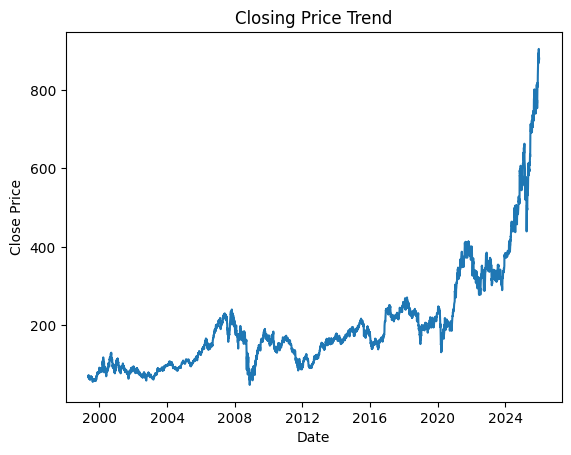

In [32]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['Date'], df['close'])
plt.title("Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

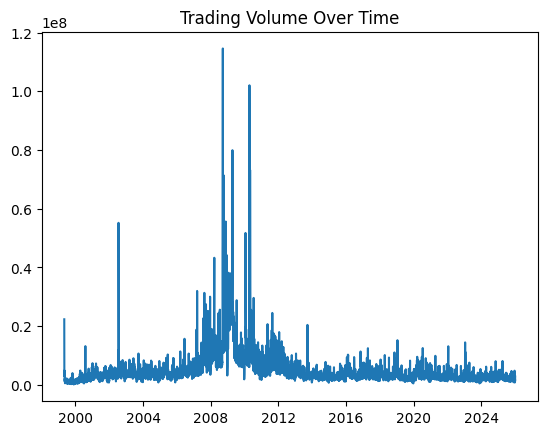

In [33]:
plt.figure()
plt.plot(df['Date'], df['volume'])
plt.title("Trading Volume Over Time")
plt.show()

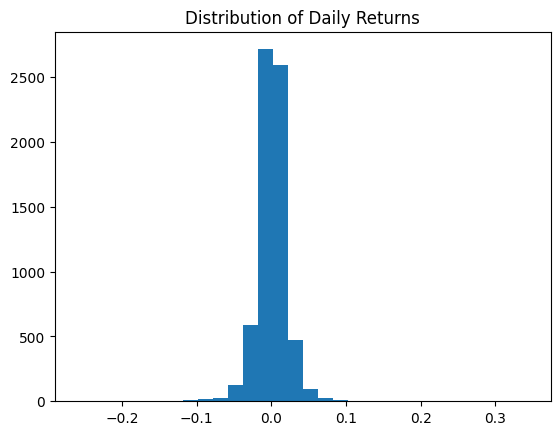

In [34]:
plt.figure()
plt.hist(df['Daily_Return'].dropna(), bins=30)
plt.title("Distribution of Daily Returns")
plt.show()

In [35]:
df['volume'].mean()

np.float64(4846682.635266061)

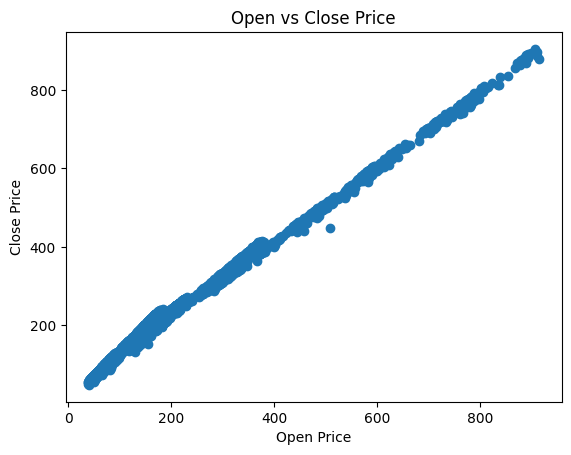

In [36]:
plt.figure()
plt.scatter(df['open'], df['close'])
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Open vs Close Price")
plt.show()


In [37]:
df.loc[df['close'].idxmax()][['Date','close']]

,6704
Date,2025-12-26 00:00:00
close,905.309998


In [38]:
df.loc[df['close'].idxmin()][['Date','close']]

,2405
Date,2008-11-21 00:00:00
close,47.41


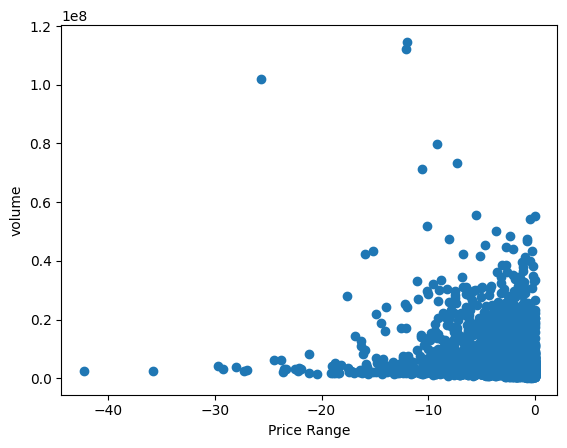

In [39]:
plt.figure()
plt.scatter(df['Price_Range'], df['volume'])
plt.xlabel("Price Range")
plt.ylabel("volume")
plt.show()

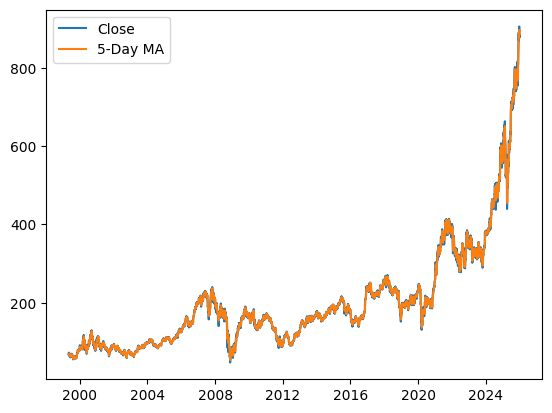

In [40]:
df['MA_5'] = df['close'].rolling(5).mean()

plt.figure()
plt.plot(df['Date'], df['close'], label='Close')
plt.plot(df['Date'], df['MA_5'], label='5-Day MA')
plt.legend()
plt.show()

In [41]:
df.sort_values('Price_Range', ascending=False).head()

,date,open,high,low,close,adj_close,volume,Date,Price_Range,Daily_Return,MA_5
2059,2007-07-12,162.290344,220.289993,220.289993,216.720001,218.470001,6072900,2007-07-12,0.0,0.009644,218.219998
2146,2007-11-13,172.259781,233.039993,233.039993,218.339996,220.940002,17393800,2007-11-13,0.0,0.048502,208.776004
2012,2007-05-04,167.484131,227.339996,227.339996,221.429993,222.600006,5632300,2007-05-04,0.0,0.013178,218.251999
3428,2012-12-17,96.765099,123.489998,123.489998,120.029999,120.190002,5476700,2012-12-17,0.0,0.014624,118.208000
3431,2012-12-20,101.646805,129.720001,129.720001,126.620003,127.349998,4402500,2012-12-20,0.0,-0.001498,123.250000


In [42]:
corr = df[['open','high','low','close','volume']].corr()
corr

,open,high,low,close,volume
open,1.000000,0.997624,0.997517,0.997395,-0.197663
high,0.997624,1.000000,0.999833,0.999823,-0.189671
low,0.997517,0.999833,1.000000,0.999743,-0.184815
close,0.997395,0.999823,0.999743,1.000000,-0.195141
volume,-0.197663,-0.189671,-0.184815,-0.195141,1.000000


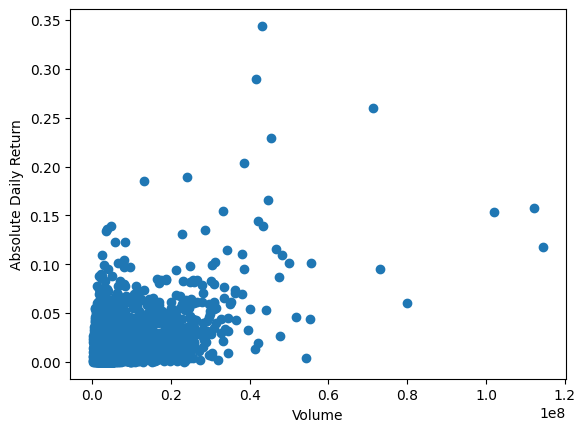

In [43]:
plt.figure()
plt.scatter(df['volume'], abs(df['Daily_Return']))
plt.xlabel("Volume")
plt.ylabel("Absolute Daily Return")
plt.show()

In [44]:
df['Market_Type'] = df.apply(
    lambda x: 'Bullish' if x['close'] > x['open'] else 'Bearish',
    axis=1
)
df['Market_Type'].value_counts()

,count
Market_Type,
Bullish,6563
Bearish,146


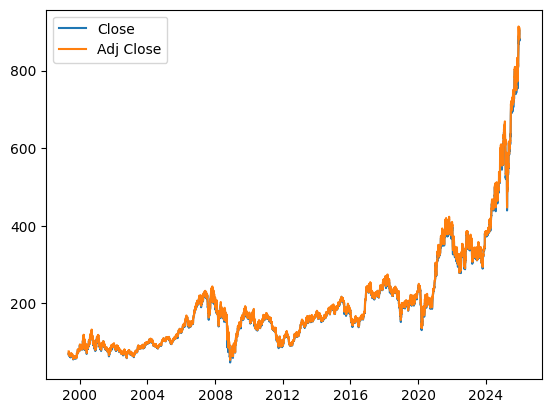

In [45]:
plt.figure()
plt.plot(df['Date'], df['close'], label='Close')
plt.plot(df['Date'], df['adj_close'], label='Adj Close')
plt.legend()
plt.show()

# MODEL BUILDING USING LINEAR REGRESSION

Objective: To predict the Closing Price of a stock using Open, High, Low, and Volume values by applying Linear Regression.

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
X_train

,open,high,low,volume
6547,594.667969,603.809998,607.710022,2765800
6032,321.282318,343.959991,345.059998,1966300
6670,783.694824,787.580017,798.200012,1572500
6212,365.467682,381.959991,383.049988,1547300
3871,148.563766,185.289993,186.949997,1826100
...,...,...,...,...
3772,127.749840,160.369995,161.000000,2079500
5191,199.826843,230.449997,232.199997,2280800
5226,205.818680,237.360001,237.869995,2591300
5390,176.548920,199.899994,200.699997,2541200


In [50]:
X_test

,open,high,low,volume
1188,73.215675,102.279999,102.489998,4096200
5916,321.443787,348.869995,350.670013,2515600
247,67.618080,97.062500,97.875000,1341500
5960,327.382111,353.000000,356.500000,1989000
2836,113.189537,149.250000,152.000000,7734400
...,...,...,...,...
6247,373.974121,388.100006,391.040009,1697700
2499,93.203125,124.330002,124.980003,25610700
102,43.167217,62.250000,62.250000,819900
2138,177.559799,240.210007,244.410004,12579000


In [51]:
y_train

,close
6547,593.059998
6032,341.529999
6670,777.000000
6212,378.529999
3871,185.100006
...,...
3772,159.699997
5191,229.940002
5226,235.460007
5390,195.289993


In [52]:
y_test

,close
1188,99.349998
5916,342.589996
247,87.500000
5960,349.500000
2836,148.910004
...,...
6247,385.250000
2499,117.449997
102,61.062500
2138,238.750000


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)
y_pred

array([100.652083  , 344.43681962,  96.25521661, ...,  61.48128257,
       237.3421048 , 397.68635122])

In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 6.866707794322153
R² Score: 0.9995969481496115


In [56]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients

,Feature,Coefficient
0,open,-2.590050e-02
1,high,6.363206e-01
2,low,3.747777e-01
3,volume,-1.843225e-07


In [57]:
interceptt=model.intercept_

In [73]:
interceptt

np.float64(-0.190407669566099)

In [74]:
model.coef_

array([-2.59004969e-02,  6.36320579e-01,  3.74777713e-01, -1.84322539e-07])

In [75]:
X_test.head(2)

,open,high,low,volume
1188,73.215675,102.279999,102.489998,4096200
5916,321.443787,348.869995,350.670013,2515600


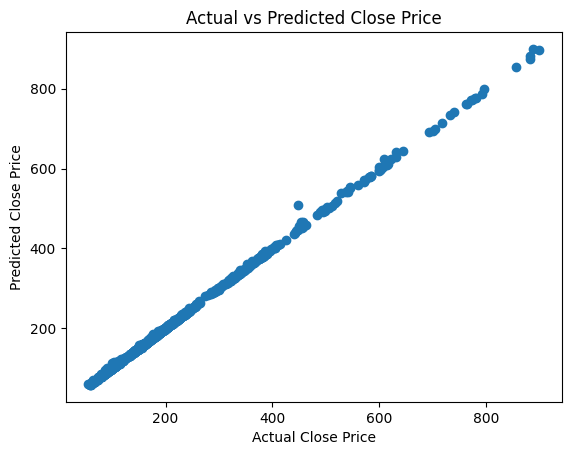

In [58]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.show()

# MODEL BUILDING USING POLYNOMIAL REGRESSION

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly.fit_transform(X)

In [61]:
X_poly

array([[4.86965752e+01, 7.03750000e+01, 7.72500000e+01, ...,
        5.96756250e+03, 1.72428952e+09, 4.98222577e+14],
       [4.78315926e+01, 6.91250000e+01, 6.98750000e+01, ...,
        4.88251562e+03, 5.28653288e+08, 5.72398165e+13],
       [4.70099144e+01, 6.79375000e+01, 6.93750000e+01, ...,
        4.81289062e+03, 2.01582938e+08, 8.44309249e+12],
       ...,
       [8.84419983e+02, 8.84419983e+02, 8.95020020e+02, ...,
        8.01060835e+05, 1.64084020e+09, 3.36098889e+12],
       [8.79000000e+02, 8.79000000e+02, 8.86000000e+02, ...,
        7.84996000e+05, 1.08224900e+09, 1.49206225e+12],
       [9.14340027e+02, 9.14340027e+02, 9.14440002e+02, ...,
        8.36200518e+05, 2.57524593e+09, 7.93098244e+12]])

In [62]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

In [63]:
X_train_p

array([[5.94667969e+02, 6.03809998e+02, 6.07710022e+02, ...,
        3.69311471e+05, 1.68080438e+09, 7.64964964e+12],
       [3.21282318e+02, 3.43959991e+02, 3.45059998e+02, ...,
        1.19066402e+05, 6.78491473e+08, 3.86633569e+12],
       [7.83694824e+02, 7.87580017e+02, 7.98200012e+02, ...,
        6.37123259e+05, 1.25516952e+09, 2.47275625e+12],
       ...,
       [2.05818680e+02, 2.37360001e+02, 2.37869995e+02, ...,
        5.65821346e+04, 6.16392518e+08, 6.71483569e+12],
       [1.76548920e+02, 1.99899994e+02, 2.00699997e+02, ...,
        4.02804888e+04, 5.10018832e+08, 6.45769744e+12],
       [4.37613754e+01, 6.20499992e+01, 6.39000015e+01, ...,
        4.08321020e+03, 4.21049890e+08, 4.34175566e+13]])

In [64]:
X_test_p

array([[7.32156754e+01, 1.02279999e+02, 1.02489998e+02, ...,
        1.05041997e+04, 4.19819529e+08, 1.67788544e+13],
       [3.21443787e+02, 3.48869995e+02, 3.50670013e+02, ...,
        1.22969458e+05, 8.82145486e+08, 6.32824336e+12],
       [6.76180801e+01, 9.70625000e+01, 9.78750000e+01, ...,
        9.57951562e+03, 1.31299312e+08, 1.79962225e+12],
       ...,
       [4.31672173e+01, 6.22500000e+01, 6.22500000e+01, ...,
        3.87506250e+03, 5.10387750e+07, 6.72236010e+11],
       [1.77559799e+02, 2.40210007e+02, 2.44410004e+02, ...,
        5.97362499e+04, 3.07443344e+09, 1.58231241e+14],
       [3.64191498e+02, 4.03049988e+02, 4.03339996e+02, ...,
        1.62683153e+05, 7.05360986e+08, 3.05830144e+12]])

In [65]:
y_train_p

,close
6547,593.059998
6032,341.529999
6670,777.000000
6212,378.529999
3871,185.100006
...,...
3772,159.699997
5191,229.940002
5226,235.460007
5390,195.289993


In [66]:
y_test_p

,close
1188,99.349998
5916,342.589996
247,87.500000
5960,349.500000
2836,148.910004
...,...
6247,385.250000
2499,117.449997
102,61.062500
2138,238.750000


In [67]:
poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)

LinearRegression()

In [68]:
y_pred_poly = poly_model.predict(X_test_p)

In [69]:
y_pred_poly

array([106.37872586, 332.27263007, 108.46529217, ...,  87.75241563,
       255.46570114, 431.19585204])

In [70]:
mse_poly = mean_squared_error(y_test_p, y_pred_poly)
r2_poly = r2_score(y_test_p, y_pred_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R²:", r2_poly)

Polynomial Regression MSE: 444.2608723422792
Polynomial Regression R²: 0.9739234328857256


In [71]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression (Degree 2)"],
    "MSE": [mse, mse_poly],
    "R2 Score": [r2, r2_poly]
})
comparison

,Model,MSE,R2 Score
0,Linear Regression,6.866708,0.999597
1,Polynomial Regression (Degree 2),444.260872,0.973923


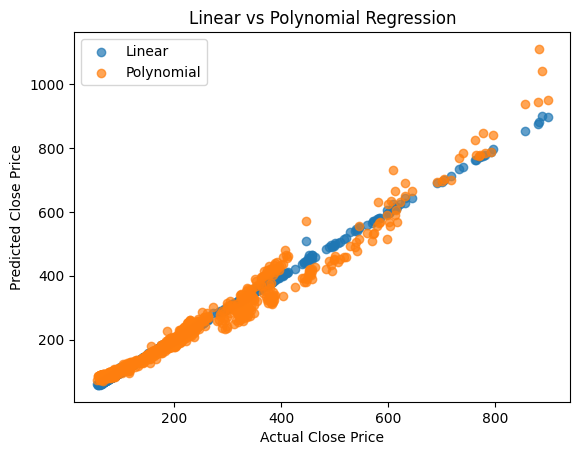

In [72]:
plt.figure()
plt.scatter(y_test, y_pred, label="Linear", alpha=0.7)
plt.scatter(y_test_p, y_pred_poly, label="Polynomial", alpha=0.7)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.legend()
plt.title("Linear vs Polynomial Regression")
plt.show()